In [26]:
import pandas as pd

nombre_csv = 4160
dp = pd.read_csv(f'Datos_prueba2/{nombre_csv}_p.csv')
# Filtrar por una fecha específica, por ejemplo '2024-11-01'
fecha_deseada = '2024-11-1'
datos_filtrados_dp = dp[dp['Fecha'] >= fecha_deseada]

# Mostrar los datos filtrados
datos_filtrados_dp[['Fecha','Hora','nivel_estres']]

,Fecha,Hora,nivel_estres
2328,2024-11-10,0,peligro
2329,2024-11-10,1,peligro
2330,2024-11-10,2,peligro
2331,2024-11-10,3,peligro
2332,2024-11-10,4,peligro
...,...,...,...
2515,2024-11-22,19,normal
2516,2024-11-22,20,normal
2517,2024-11-22,21,normal
2518,2024-11-22,22,normal


In [27]:
datos_filtrados_dp

,Fecha,Hora,period eating,period other,period resting,period rumination,period eating_count,period other_count,period resting_count,period rumination_count,nivel_actividad,distancia,nivel_estres
2328,2024-11-10,0,0.157,0.0,0.449,0.393,1.0,0.0,2.0,1.0,-0.224979,0.447385,peligro
2329,2024-11-10,1,0.000,0.0,0.685,0.315,0.0,0.0,2.0,1.0,-0.256563,0.372876,peligro
2330,2024-11-10,2,0.000,0.0,0.557,0.443,0.0,0.0,1.0,1.0,-0.276883,0.329244,peligro
2331,2024-11-10,3,0.000,0.0,0.433,0.567,0.0,0.0,1.0,2.0,-0.296569,0.329820,peligro
2332,2024-11-10,4,0.000,0.0,0.475,0.525,0.0,0.0,1.0,1.0,-0.289901,0.253092,peligro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2024-11-22,19,0.000,0.0,0.354,0.646,0.0,0.0,1.0,2.0,-0.309110,0.052213,normal
2516,2024-11-22,20,0.118,0.0,0.462,0.420,1.0,0.0,1.0,1.0,-0.240343,0.063239,normal
2517,2024-11-22,21,0.354,0.0,0.207,0.439,1.0,0.0,2.0,3.0,-0.177580,0.076083,normal
2518,2024-11-22,22,0.433,0.0,0.220,0.348,1.0,0.0,2.0,1.0,-0.141321,0.093184,normal


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Parámetros
nombre_csv = 4160  # Nombre base del archivo CSV
timesteps = 24  # Número de pasos temporales

# Cargar el modelo guardado
try:
    model_cargado = load_model(f'entrenamientos/{nombre_csv}modelo_entrenado.h5')
except Exception as e:
    print(f"Error al cargar el modelo: {e}")
    exit()


datos_filtrados_dp['datetime'] = pd.to_datetime(datos_filtrados_dp['Fecha'] + ' ' + datos_filtrados_dp['Hora'].astype(str) + ':00:00')
datos_filtrados_dp['Fecha'] = pd.to_datetime(datos_filtrados_dp['Fecha'])


# Seleccionar características para predicción
X_test = datos_filtrados_dp[['period eating', 'period other', 'period resting', 'period rumination']]

# Validar si hay suficientes datos para estandarización
try:
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)
except Exception as e:
    print(f"Error al escalar los datos: {e}")
    exit()

# Validar que hay suficientes datos para crear secuencias
if len(X_test_scaled) > timesteps:
    # Crear secuencias temporales
    X_test_reshaped = np.array([X_test_scaled[i:i + timesteps] for i in range(len(X_test_scaled) - timesteps)])
    print("Forma de X_test_reshaped:", X_test_reshaped.shape)
    try:
        # Predecir las etiquetas
        y_pred_proba = model_cargado.predict(X_test_reshaped)
        y_pred_classes = np.argmax(y_pred_proba, axis=1)
        print("Clases predichas:", y_pred_classes)

        # Identificar horas con niveles de estrés alerta y peligro
        niveles_estres = ['Normal', 'Alerta', 'Peligro']
        horas_estres = [(datos_filtrados_dp['datetime'].iloc[i], niveles_estres[clase])
                        for i, clase in enumerate(y_pred_classes) if clase > 0]
        print("Horas con niveles de estrés alerta y peligro:", horas_estres)
    except Exception as e:
        print(f"Error en la predicción: {e}")
        horas_estres = []
else:
    print("No hay suficientes datos para generar secuencias de 24 timesteps.")
    horas_estres = []



C:\Users\PC\AppData\Local\Temp\ipykernel_19052\76202901.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados_dp['datetime'] = pd.to_datetime(datos_filtrados_dp['Fecha'] + ' ' + datos_filtrados_dp['Hora'].astype(str) + ':00:00')
C:\Users\PC\AppData\Local\Temp\ipykernel_19052\76202901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados_dp['Fecha'] = pd.to_datetime(datos_filtrados_dp['Fecha'])


Forma de X_test_reshaped: (168, 24, 4)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Clases predichas: [0 1 1 1 1 1 0 0 0 0 1 1 2 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Horas con niveles de estrés alerta y peligro: [(Timestamp('2024-11-10 01:00:00'), 'Alerta'), (Timestamp('2024-11-10 02:00:00'), 'Alerta'), (Timestamp('2024-11-10 03:00:00'), 'Alerta'), (Timestamp('2024-11-10 04:00:00'), 'Alerta'), (Timestamp('2024-11-10 05:00:00'), 'Alerta'), (Timestamp('2024-11-10 10:00:00'), 'Alerta'), (Timestamp('2024-11-10 11:00:00'), 'Alerta'), (Timestamp('2024-11-10 12:00:00'), 'Peligro'), (Timestamp('2024-11-10 13:00:00'), 'Alerta'), (Timestamp('2024-11-10 19:00:00'), 'Alerta'), (Timestamp('2024-11-10 20:00:00'), 'Alerta'), (Timestam

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6176 - loss: 1.0528 - val_accuracy: 0.6815 - val_loss: 1.0648
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6655 - loss: 1.0172 - val_accuracy: 0.7224 - val_loss: 0.9784
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6892 - loss: 1.0020 - val_accuracy: 0.6943 - val_loss: 0.9966
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7024 - loss: 1.0084 - val_accuracy: 0.6859 - val_loss: 0.9829
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6424 - loss: 0.9944 - val_accuracy: 0.7135 - val_loss: 0.9698
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6585 - loss: 0.9920 - val_accuracy: 0.6410 - val_loss: 0.9987
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6660 - loss: 0.9958 - val_accuracy: 0.6599 - val_loss: 0.9886
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6542 - loss: 0.9598 - val_accu

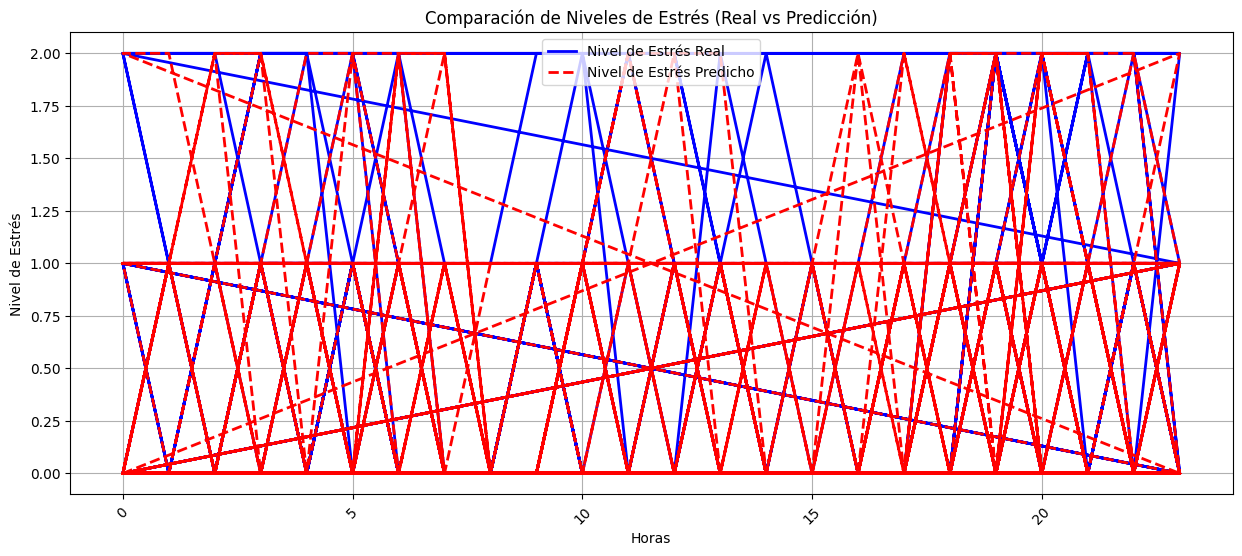

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Semilla aleatoria
seed_value = 24
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(48)

# 1. Cargar Datos
nombre_csv = 4160
de = pd.read_csv(f'Datos_entrenamiento2/{nombre_csv}_e.csv')
dp = pd.read_csv(f'Datos_prueba2/{nombre_csv}_p.csv')

# Mapear niveles de estrés
mapping = {'normal': 0, 'alerta': 1, 'peligro': 2}
de['nivel_estres'] = de['nivel_estres'].map(mapping)
dp['nivel_estres'] = dp['nivel_estres'].map(mapping)

# Separar características y etiquetas
X_train = de[['period eating', 'period other', 'period resting', 'period rumination']]
y_train = de['nivel_estres']
X_test = dp[['period eating', 'period other', 'period resting', 'period rumination']]
y_test = dp['nivel_estres']

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Expandir a 24 horas (timesteps)
timesteps = 24
X_train_reshaped = np.array([X_train_scaled[i:i + timesteps] for i in range(len(X_train_scaled) - timesteps)])
y_train = y_train[timesteps:]
X_test_reshaped = np.array([X_test_scaled[i:i + timesteps] for i in range(len(X_test_scaled) - timesteps)])
y_test = y_test[timesteps:]

# Calcular pesos de clase
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Convertir etiquetas a categórico
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

# 2. Construir y Entrenar el Modelo LSTM
model = Sequential()
model.add(LSTM(144, activation='relu', input_shape=(timesteps, X_train_scaled.shape[1])))
model.add(Dense(36, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train_categorical, epochs=50, batch_size=24,
          validation_data=(X_test_reshaped, y_test_categorical), class_weight=class_weights_dict)

# Guardar el modelo
#model.save(f'entrenamientos/{nombre_csv}modelo_entrenado.h5')

# 3. Predecir en los Datos de Prueba
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

# 4. Gráfica de Resultados
horas = dp['Hora'][timesteps:].reset_index(drop=True)  # Horas de prueba ajustadas
real_stress = y_test.reset_index(drop=True)
pred_stress = pd.Series(y_pred, index=horas)

plt.figure(figsize=(15, 6))

# Gráfica de estrés real
plt.plot(horas, real_stress, label='Nivel de Estrés Real', color='blue', linewidth=2)
# Gráfica de estrés predicho
plt.plot(horas, pred_stress, label='Nivel de Estrés Predicho', color='red', linestyle='--', linewidth=2)

# Configuración de la gráfica
plt.title('Comparación de Niveles de Estrés (Real vs Predicción)')
plt.xlabel('Horas')
plt.ylabel('Nivel de Estrés')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()
